# Deep Autoencoder in Keras (CIFAR-10)

In [1]:
%pylab inline
import tensorflow as tf
import keras
from keras.layers import Input, Dense
from keras.models import Model, Merge, Sequential
from keras.layers.core import Reshape
from keras.datasets import cifar10
from keras.utils.visualize_util import plot as keras_plot
from keras.utils.visualize_util import model_to_dot

from tempfile import NamedTemporaryFile

from IPython.display import SVG, Image
import matplotlib.pyplot as plt

import shutil
import os

Populating the interactive namespace from numpy and matplotlib


Using TensorFlow backend.


## Data

In [2]:
(train_x, train_y), (test_x, test_y) = cifar10.load_data()
train_x = train_x.astype('float32')/255.
train_y = train_y.astype('float32')

# Only specific Category
train_x = train_x[(train_y == 1).reshape(50000)]
test_x = test_x[(test_y == 1).reshape(10000)]

(5000, 32, 32, 3)


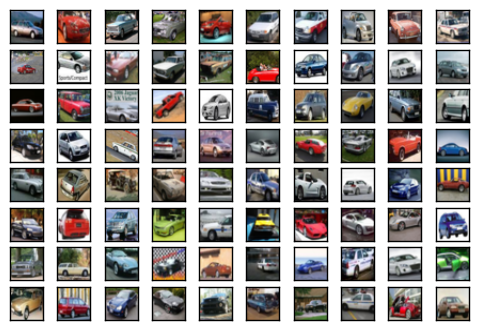

In [3]:
def display(images, size=80):
    for i in range(size):
        ax = subplot(size/10, 10, i+1)
        ax.imshow(images[i].reshape(32, 32, 3))
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

print(train_x.shape)
display(train_x[:80])

## Deep Autoencoder Model

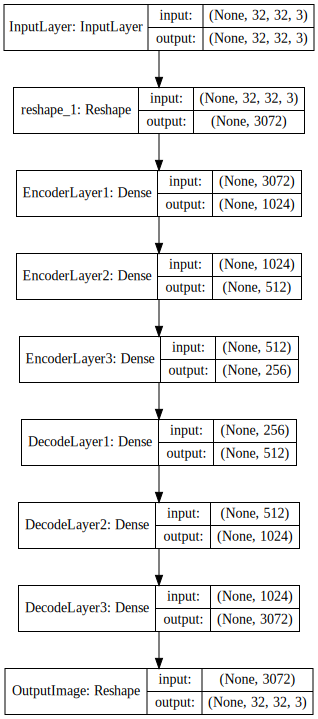

In [4]:
layer1_dim = 1024
layer2_dim = 512
layer3_dim = 256

input_img = Input(shape=(32,32, 3), name='InputLayer')
reshaped_img = Reshape((3072,))(input_img)
encoder1 = Dense(output_dim=layer1_dim, activation='relu', name='EncoderLayer1')(reshaped_img)
encoder2 = Dense(output_dim=layer2_dim, activation='relu', name='EncoderLayer2')(encoder1)
encoder3 = Dense(output_dim=layer3_dim, activation='relu', name='EncoderLayer3')(encoder2)

decoder1 = Dense(layer2_dim, activation='sigmoid', name='DecodeLayer1')(encoder3)
decoder2 = Dense(layer1_dim, activation='sigmoid', name='DecodeLayer2')(decoder1)
decoder3 = Dense(3072, activation='sigmoid', name='DecodeLayer3')(decoder2)
output_img = Reshape((32, 32, 3), name='OutputImage')(decoder3)


# Input -> Recontruction
autoencoder = Model(input=input_img, output=output_img)
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

# # Visualization
SVG(model_to_dot(autoencoder, show_shapes=True).create(prog='dot', format='svg'))

## Deep Encoder Model

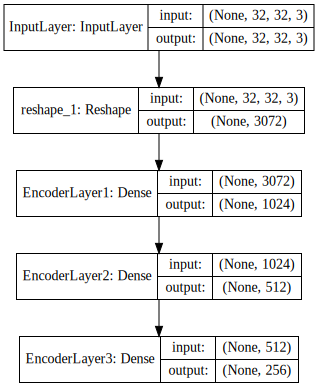

In [5]:
# Input Image -> Encoded 
encoder = Model(input=input_img, output=encoder3, name='Input2')
SVG(model_to_dot(encoder, show_shapes=True).create(prog='dot', format='svg'))

## Deep Decoder Model

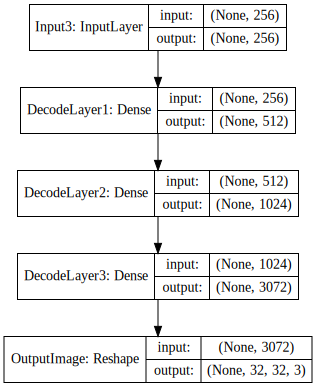

In [6]:
encoder_input = Input(shape=(layer3_dim,), name='Input3')
decoded_layer = autoencoder.layers[-4](encoder_input)
decoded_layer = autoencoder.layers[-3](decoded_layer)
decoded_layer = autoencoder.layers[-2](decoded_layer)
decoded_layer = autoencoder.layers[-1](decoded_layer)

decoder = Model(input=encoder_input, output=decoded_layer)
SVG(model_to_dot(decoder, show_shapes=True).create(prog='dot', format='svg'))

## Training

In [10]:
autoencoder.fit(train_x, train_x, 
                nb_epoch=50, 
                batch_size=256, 
                shuffle=True,
                validation_data=(test_x, test_x), 
                verbose=2)

Train on 5000 samples, validate on 1000 samples
Epoch 1/50
0s - loss: 0.6806 - val_loss: 13.5045
Epoch 2/50
0s - loss: 0.6805 - val_loss: 13.3293
Epoch 3/50
0s - loss: 0.6804 - val_loss: 13.3314
Epoch 4/50
0s - loss: 0.6803 - val_loss: 13.1381
Epoch 5/50
0s - loss: 0.6802 - val_loss: 12.9094
Epoch 6/50
0s - loss: 0.6802 - val_loss: 12.8407
Epoch 7/50
0s - loss: 0.6800 - val_loss: 12.6770
Epoch 8/50
0s - loss: 0.6799 - val_loss: 12.6313
Epoch 9/50
0s - loss: 0.6798 - val_loss: 12.5250
Epoch 10/50
0s - loss: 0.6797 - val_loss: 12.2620
Epoch 11/50
0s - loss: 0.6795 - val_loss: 12.0729
Epoch 12/50
0s - loss: 0.6793 - val_loss: 11.9429
Epoch 13/50
0s - loss: 0.6792 - val_loss: 11.7358
Epoch 14/50
0s - loss: 0.6790 - val_loss: 11.6854
Epoch 15/50
0s - loss: 0.6787 - val_loss: 11.5515
Epoch 16/50
0s - loss: 0.6785 - val_loss: 11.3639
Epoch 17/50
0s - loss: 0.6782 - val_loss: 11.0544
Epoch 18/50
0s - loss: 0.6779 - val_loss: 10.9640
Epoch 19/50
0s - loss: 0.6776 - val_loss: 10.9943
Epoch 20/50

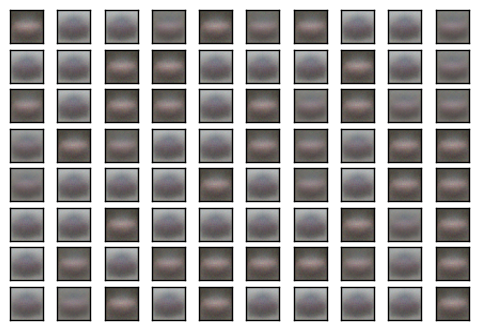

In [11]:
encoded_images = encoder.predict(test_x)
decoded_images = decoder.predict(encoded_images)
display(decoded_images)

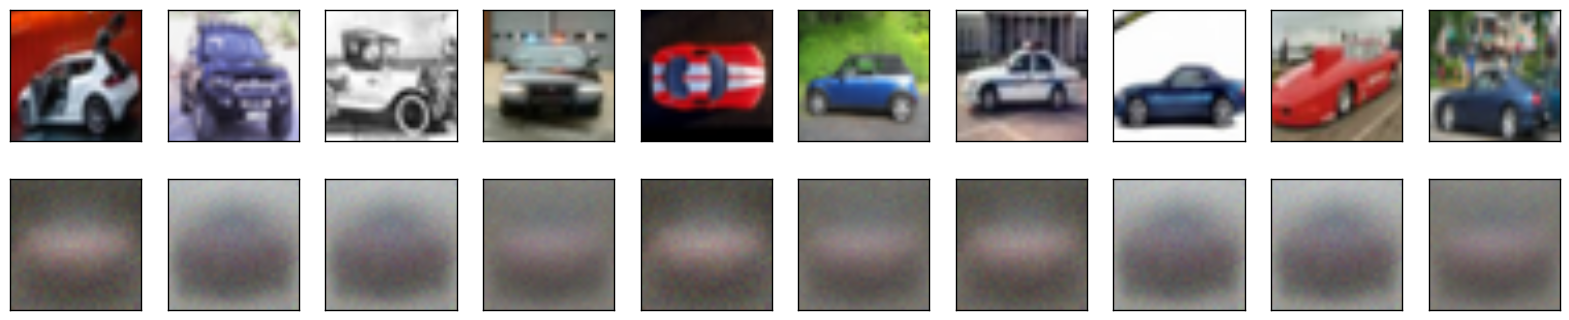

In [12]:
n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(test_x[i])
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_images[i])
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()